In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

## Loading data

In [14]:
train = '../data/chest_xray/train'
test = '../data/chest_xray/test'
val = '../data/chest_xray/val'

### Setting up training and testing folders

In [15]:
# train 
os.listdir(train)
train_n = train + '/NORMAL/'
train_p = train + '/PNEUMONIA/'

#
os.listdir(test)
test_n = test + '/NORMAL/'
test_p = test + '/PNEUMONIA/'

### Taking a look at the pictures

In [16]:
print("Train set:\n========================================")
print(f"PNEUMONIA = {len(os.listdir(os.path.join(train, 'PNEUMONIA')))}")
print(f"NORMAL = {len(os.listdir(os.path.join(train, 'NORMAL')))}")
print()

print("Test set:\n========================================")
print(f"PNEUMONIA = {len(os.listdir(os.path.join(test, 'PNEUMONIA')))}")
print(f"NORMAL = {len(os.listdir(os.path.join(test, 'NORMAL')))}")
print()

print("Validation set:\n========================================")
print(f"PNEUMONIA = {len(os.listdir(os.path.join(val, 'PNEUMONIA')))}")
print(f"NORMAL = {len(os.listdir(os.path.join(val, 'NORMAL')))}")
print()

print("Total:\n========================================")
print(f"PNEUMONIA = {len(os.listdir(os.path.join(train, 'PNEUMONIA'))) + len(os.listdir(os.path.join(test, 'PNEUMONIA'))) + len(os.listdir(os.path.join(val, 'PNEUMONIA')))}")
print(f"NORMAL = {len(os.listdir(os.path.join(train, 'NORMAL'))) + len(os.listdir(os.path.join(test, 'NORMAL'))) + len(os.listdir(os.path.join(val, 'NORMAL')))}")


Train set:
PNEUMONIA = 3875
NORMAL = 1341

Test set:
PNEUMONIA = 390
NORMAL = 234

Validation set:
PNEUMONIA = 8
NORMAL = 8

Total:
PNEUMONIA = 4273
NORMAL = 1583


The data is crearly imbalanced. I will use data augmentation to increase the number of training samples and create a more robust model.

normal picture title:  IM-0221-0001.jpeg
pneumonia picture title: person474_virus_971.jpeg


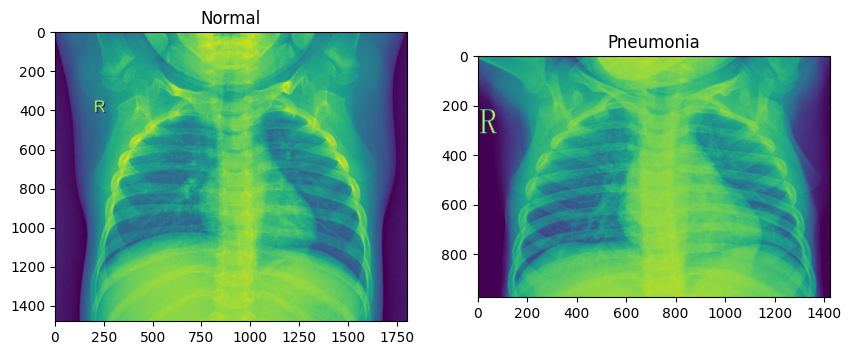

In [17]:
# Create random numbers to extract the pictures
rand_number_n = np.random.randint(0,len(os.listdir(train_n)))
rand_number_p = np.random.randint(0,len(os.listdir(train_p)))

#Normal pic 
norm_pic = os.listdir(train_n)[rand_number_n]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n + norm_pic

#Pneumonia
sic_pic =  os.listdir(train_p)[rand_number_p]
sic_address = train_p + sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's show these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()

I will normalize the size and color of the images to make it easier for the model

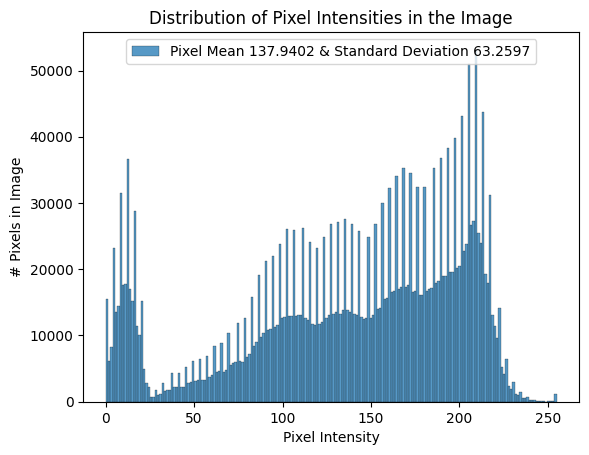

In [18]:
normal_img = os.listdir(train_n)[rand_number_n]
normal_dir = train_n
sample_img = plt.imread(os.path.join(normal_dir, normal_img))

sns.histplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')
plt.show()